In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [5]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [95]:
# Colour palette for categorical data
cat_palette = sns.color_palette("Set3")
cat_palette

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

# Exploring columns

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

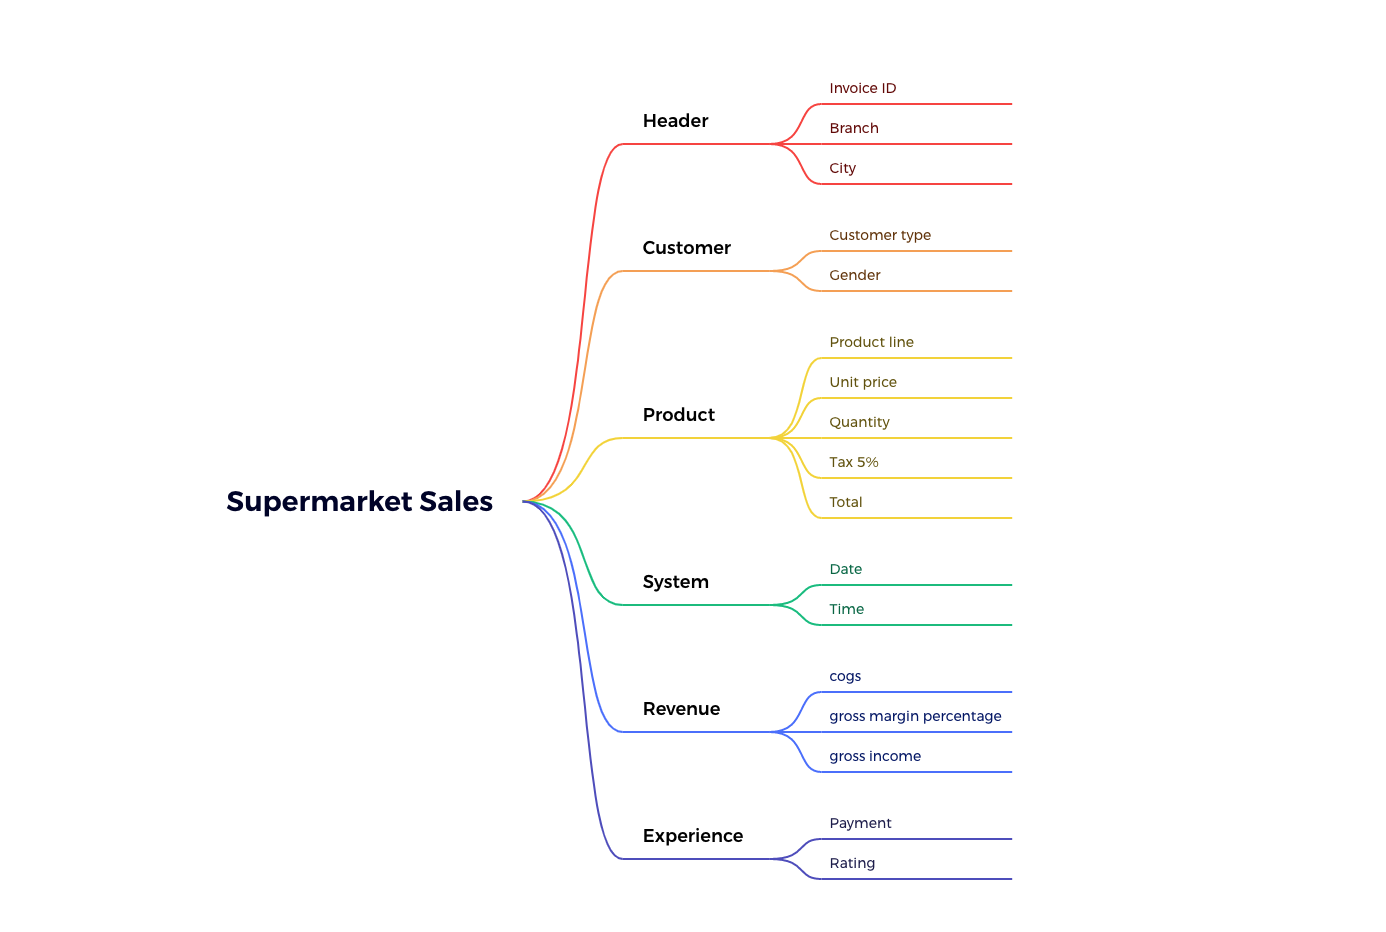

In [7]:
df.describe(include='all').round(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.00,1000.00,1000.00,1000.00,1000,1000,1000,1000.00,1000.00,1000.00,1000.00
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.67,5.51,15.38,322.97,NaN,NaN,NaN,307.59,4.76,15.38,6.97
std,NaN,NaN,NaN,NaN,NaN,NaN,26.49,2.92,11.71,245.89,NaN,NaN,NaN,234.18,0.00,11.71,1.72
min,NaN,NaN,NaN,NaN,NaN,NaN,10.08,1.00,0.51,10.68,NaN,NaN,NaN,10.17,4.76,0.51,4.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.88,3.00,5.92,124.42,NaN,NaN,NaN,118.50,4.76,5.92,5.50
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.23,5.00,12.09,253.85,NaN,NaN,NaN,241.76,4.76,12.09,7.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.94,8.00,22.45,471.35,NaN,NaN,NaN,448.90,4.76,22.45,8.50


In [8]:
def explore_columns(df):
    the_cols = ["Invoice ID", "Branch", "City", "Customer type", "Gender", "Product line", "Payment"]
    for i in the_cols:
        # when values are unique
        print("\n",i,"\n")
        if df[i].count() == df[i].nunique():
            print("Unique")
            print("Min",df[i].min())
            print("Max",df[i].max())
            print(df[i].isnull().sum())
        # when values are not unique
        else:
            print("Null Count:",df[i].isnull().sum())
            print(df[i].value_counts())
            #print(df[i].value_counts(normalize=True)*100)
    return 0

In [9]:
explore_columns(df)


 Invoice ID 

Unique
Min 101-17-6199
Max 898-04-2717
0

 Branch 

Null Count: 0
A    340
B    332
C    328
Name: Branch, dtype: int64

 City 

Null Count: 0
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

 Customer type 

Null Count: 0
Member    501
Normal    499
Name: Customer type, dtype: int64

 Gender 

Null Count: 0
Female    501
Male      499
Name: Gender, dtype: int64

 Product line 

Null Count: 0
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

 Payment 

Null Count: 0
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


0

# Price and Revenue equations

In [10]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


cogs = Unit price * Quantity

Tax 5% = cogs * 5/ 100

Total = cogs + Tax 5%

gross income = Total * gross margin percentage/ 100 


In [11]:
#Checking whether all gross margin percentages are same

df["gross margin percentage"].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

All products have the same gross margin percentage

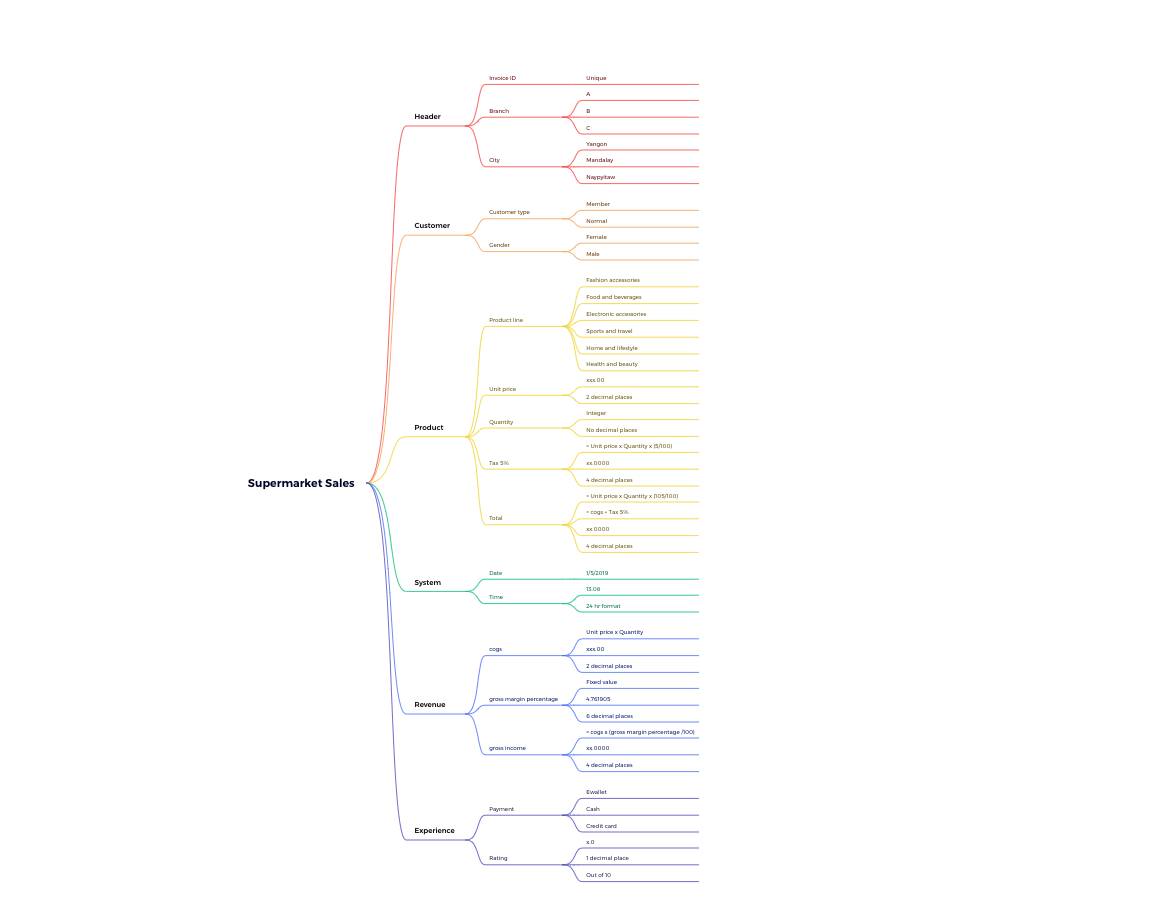

# Questions

<h3> Data : </h3> 

1. Do products of the same product line have the same unit price? 

2. Which City/ Branch sold the highest quantity of products? 

3. Which City/Branch earned the highest gross income?

4. Gross income by product line

5. Gross income by product line by City/Branch 

* Total revenue by payment type


<h3> Behavioural </h3>

* Men are more likely to purchase high price low quantity products.
 - Gender vs quantity vs unit price
 
* Gender vs product-line vs Total

* Members are more likely to purchase higher priced products than non members.
- Customer type vs price unit vs Total

* Gender vs Payment type vs Total

* Gender vs Customer type vs Total vs Payment type vs Rating

<h3> Time series and Date/Time related </h3>

* When (time, month, day) are people more likely to make purchases? Higher revenue

* Revenue fluctuation over time (datetime)

<h3> KPI </h3>

* Target customer description

* Target product description

* Total sales by hour/day/week/month/quater/year

* Average gross income or Average net income

* gross income/ cogs

* Member purchases over time

## 1. Does products of the same product line have the same unit price?

In [12]:
df2 = df.groupby(["Product line", "Unit price"])[[ "Unit price"]].count()
df2

Unit price
Product line           Unit price            
Electronic accessories 10.56                1
                       10.59                1
                       11.81                1
                       11.94                1
                       12.05                1
...                                       ...
Sports and travel      98.13                1
                       98.40                1
                       98.80                1
                       99.24                1
                       99.96                1

[993 rows x 1 columns]

In [13]:
df2["Unit price"].value_counts()

1    986
2      7
Name: Unit price, dtype: int64

In [14]:
df2["Unit price"].value_counts(normalize = True).round(2)*100

1    99.0
2     1.0
Name: Unit price, dtype: float64

In [29]:
df2.loc[df2["Unit price"] > 1]["Unit price"].value_counts

<bound method IndexOpsMixin.value_counts of Product line            Unit price
Electronic accessories  26.26         2
                        52.89         2
Fashion accessories     22.32         2
                        99.82         2
Home and lifestyle      34.42         2
                        78.38         2
Sports and travel       45.58         2
Name: Unit price, dtype: int64>

1. Products of the same product line have different prices. >> One product line does not represent one product.

2. Since each invoice only has one unit price, all extracted invoices are of monotypic product sales.

2. In the selected dataset 99% of the products have unique unit prices. Only 1% are repeated prices. 

3. Since most items have unique unit prices one could say for each unique product most of the time (99% of the time)only one invoice was extracted from sales of that specific product. 

4. *There is a possibility that *all* of the products in the dataset are unique and the 1% of the time where the unit price is repeated may be due to more than one product bearing the same price.*  


** Maybe this dataset is a subset of all the sales made at each store. 

** i.e.: For each store, extract one invoice where the customer bought only one type of product( Qty can be many) and product unit price is unique. 

In [31]:
#unit_price_by_branch_prodline = df3
df3 = df.groupby(["Product line", "Branch", "Unit price"])[[ "Unit price"]].count()
df3 
df3["Unit price"].value_counts()

1    990
2      5
Name: Unit price, dtype: int64

In [35]:
df3["Unit price"].value_counts(normalize=True)*100

1    99.497487
2     0.502513
Name: Unit price, dtype: float64

## 2. Which City/ Branch sold the highest quantity of products? 

In [16]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [50]:
quantity_by_city = df.groupby("City")[["Quantity"]].sum()
quantity_by_city

,Quantity
City,
Mandalay,1820
Naypyitaw,1831
Yangon,1859


* Sales quantities are almost equally divided among the three cities/branches.

## 3. Which City/Branch earned the highest gross income?

In [52]:
grossincome_by_city = df.groupby("City")[["gross income"]].sum()
grossincome_by_city

,gross income
City,
Mandalay,5057.0320
Naypyitaw,5265.1765
Yangon,5057.1605


In [239]:
grossincome_by_city.reset_index(inplace = True)

In [270]:
grossincome_by_city["gross tot income %"] = (grossincome_by_city["gross income"]/grossincome_by_city["gross income"].sum()).round(2) * 100


<AxesSubplot: xlabel='gross income', ylabel='City'>

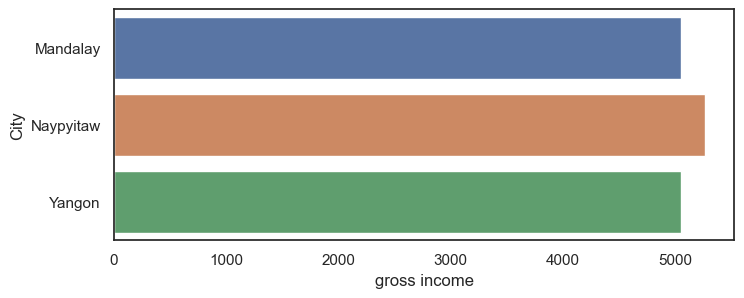

In [273]:
fig = plt.figure(figsize=(8, 3))
sns.barplot(data = grossincome_by_city, y = "City" , x = "gross income")

<AxesSubplot: xlabel='gross tot income %', ylabel='City'>

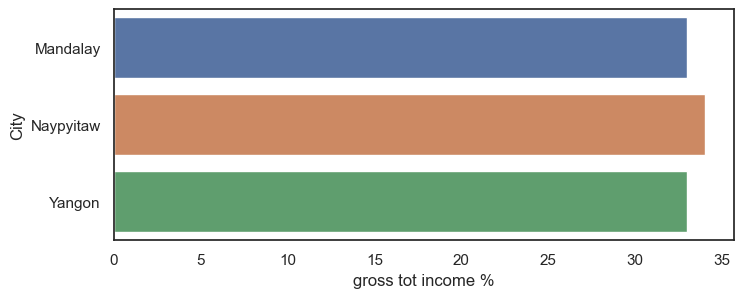

In [274]:
fig = plt.figure(figsize=(8, 3))
sns.barplot(data = grossincome_by_city, y = "City" , x = "gross tot income %")

In [275]:
grossincome_by_city

,City,gross income,gross tot income %
0,Mandalay,5057.0320,33.0
1,Naypyitaw,5265.1765,34.0
2,Yangon,5057.1605,33.0


* Total gross income is also almost equal in the three cities/branches. 

* Only Naypyitaw has a slight increase of ~208 (1%)


## 4. Gross income by product line

In [262]:
grossincome_by_productline = df.groupby("Product line")[["gross income"]].sum()
grossincome_by_productline
grossincome_by_productline["gross tot income %"] = (grossincome_by_productline["gross income"]/grossincome_by_productline["gross income"].sum()).round(2) * 100
grossincome_by_productline

,gross income,gross tot income %
Product line,,
Electronic accessories,2587.5015,17.0
Fashion accessories,2585.9950,17.0
Food and beverages,2673.5640,17.0
Health and beauty,2342.5590,15.0
Home and lifestyle,2564.8530,17.0
Sports and travel,2624.8965,17.0


In [263]:
grossincome_by_productline.reset_index(inplace= True)

In [267]:
grossincome_by_productline["gross income"].mean().round(4)

2563.2282

<AxesSubplot: xlabel='gross tot income %', ylabel='Product line'>

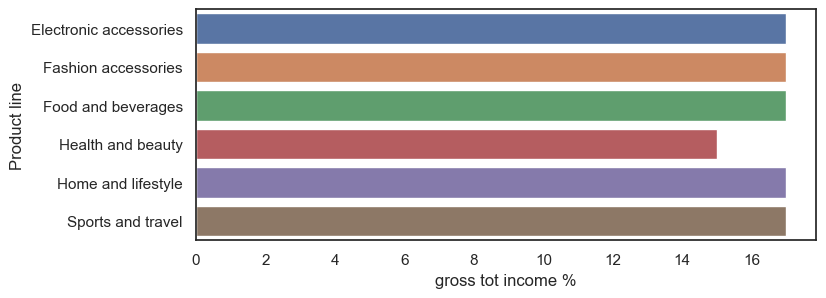

In [269]:
grossincome_by_productline
fig = plt.figure(figsize=(8, 3))
sns.barplot(data = grossincome_by_productline, y = "Product line" , x = "gross tot income %")

* Gross income percentage of each product line is around 17% 
* "Health and beauty" is considerably below average  (15%) 

## 5. Gross income by product line by City/Branch 

In [64]:
ginc_productln_city = df.groupby(["Product line","City"])[["gross income"]].sum()
ginc_productln_city

ginc_productln_city= ginc_productln_city.reset_index()
ginc_productln_city

,Product line,City,gross income
0,Electronic accessories,Mandalay,811.9735
1,Electronic accessories,Naypyitaw,903.2845
2,Electronic accessories,Yangon,872.2435
3,Fashion accessories,Mandalay,781.5865
4,Fashion accessories,Naypyitaw,1026.6700
5,Fashion accessories,Yangon,777.7385
6,Food and beverages,Mandalay,724.5185
7,Food and beverages,Naypyitaw,1131.7550
8,Food and beverages,Yangon,817.2905
9,Health and beauty,Mandalay,951.4600


sns.barplot(
    data = ginc_productln_city, 
    y = "Product line" , 
    x = "gross income", 
    hue = "City", 
    #kind="bar",
    palette = cat_palette
)

[Text(0.5, 1.0, '\nYangon total gross income by Product line')]

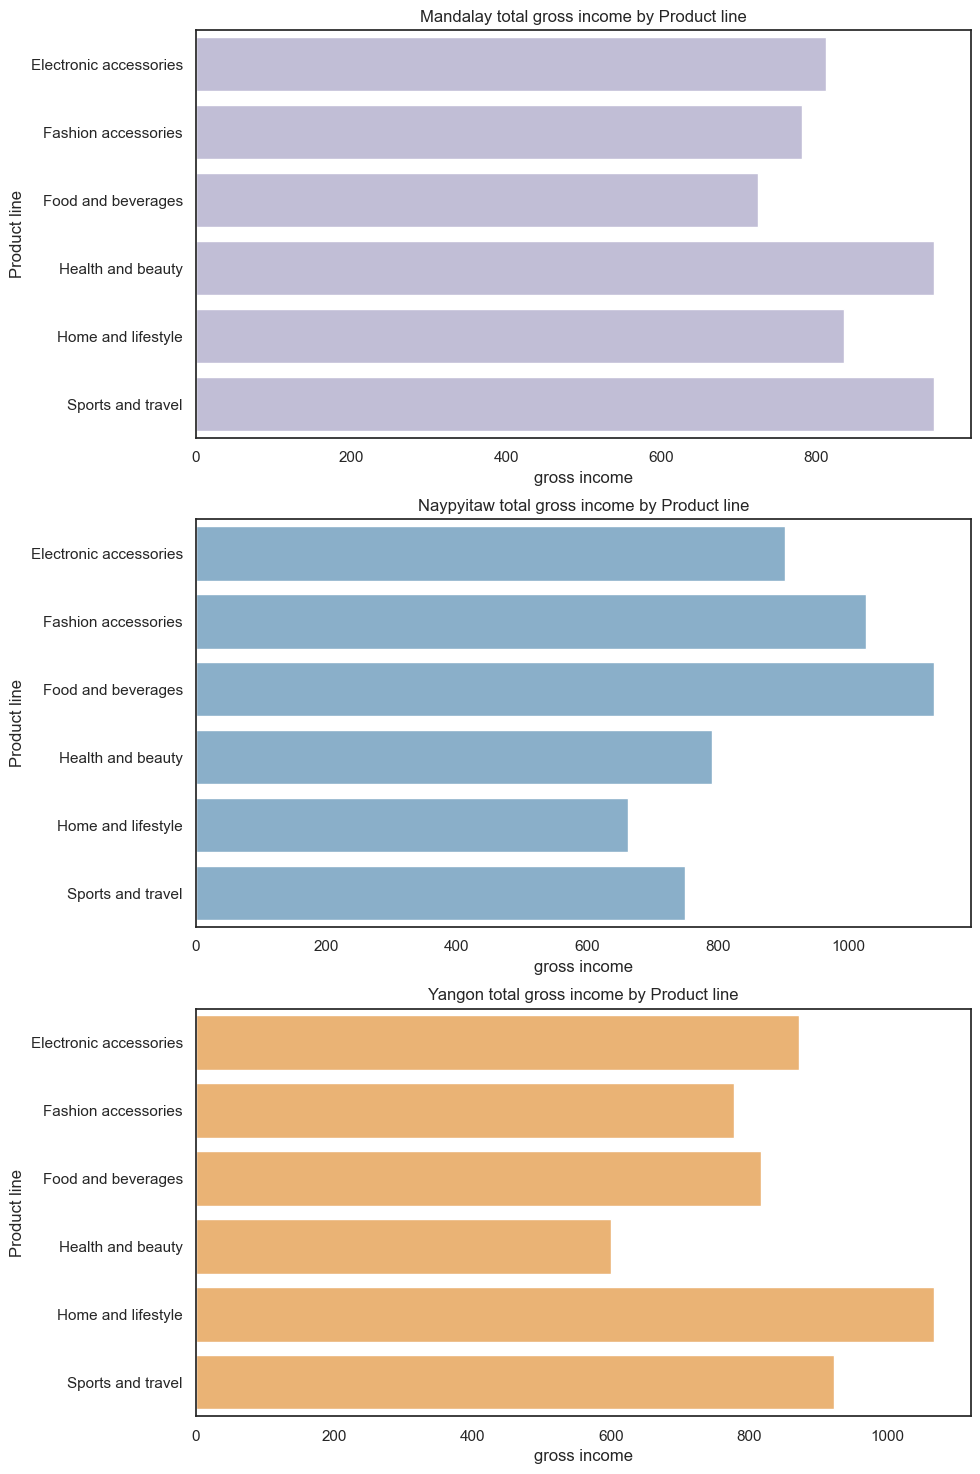

In [276]:
mandalay = ginc_productln_city.loc[ginc_productln_city["City"] == "Mandalay"]
naypyitaw = ginc_productln_city.loc[ginc_productln_city["City"] == "Naypyitaw"]
yangon = ginc_productln_city.loc[ginc_productln_city["City"] == "Yangon"]

fig = plt.figure(figsize=(10, 18))
spec = fig.add_gridspec(ncols=1, nrows=3)


ax00 = fig.add_subplot(spec[0, 0])
sns.barplot(data = mandalay , y = "Product line" , x = "gross income", color = cat_palette[2], ax=ax00).set(
    title = "Mandalay total gross income by Product line")
ax10 = fig.add_subplot(spec[1, 0])
sns.barplot(data = naypyitaw , y = "Product line" , x = "gross income", color = cat_palette[4], ax=ax10).set(
    title = "\n\nNaypyitaw total gross income by Product line")
ax20 = fig.add_subplot(spec[2, 0])
sns.barplot(data = yangon , y = "Product line" , x = "gross income", color = cat_palette[5], ax=ax20).set(
    title = "\nYangon total gross income by Product line")


[Text(0.5, 1.0, '\nYangon percentage gross income by Product line')]

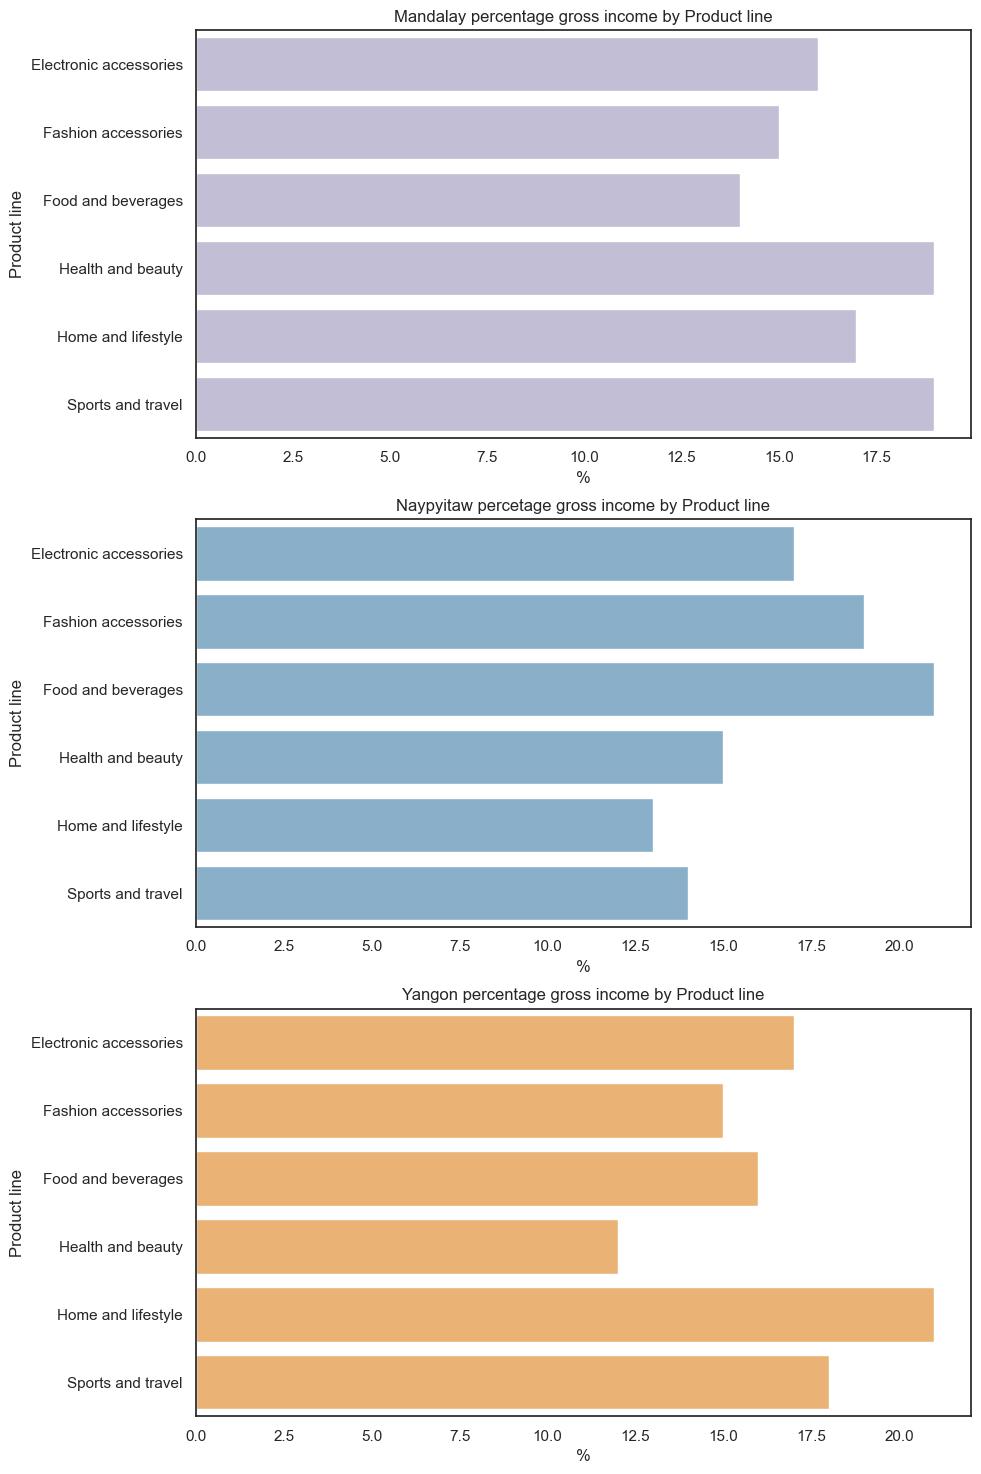

In [279]:
mandalay = mandalay.copy()
mandalay["%"]= ((mandalay["gross income"]/ mandalay["gross income"].sum())* 100 ).round(0)
naypyitaw = naypyitaw.copy()
naypyitaw["%"]= ((naypyitaw["gross income"]/ naypyitaw["gross income"].sum())* 100 ).round(0)
yangon = ginc_productln_city.loc[ginc_productln_city["City"] == "Yangon"]
yangon = yangon.copy()
yangon["%"]= ((yangon["gross income"]/ yangon["gross income"].sum())* 100 ).round(0)

fig = plt.figure(figsize=(10, 18))
spec = fig.add_gridspec(ncols=1, nrows=3)


ax00 = fig.add_subplot(spec[0, 0])
sns.barplot(data = mandalay , y = "Product line" , x = "%", color = cat_palette[2], ax=ax00).set(
    title = "Mandalay percentage gross income by Product line")
ax10 = fig.add_subplot(spec[1, 0])
sns.barplot(data = naypyitaw , y = "Product line" , x = "%", color = cat_palette[4], ax=ax10).set(
    title = "\n\nNaypyitaw percetage gross income by Product line")
ax20 = fig.add_subplot(spec[2, 0])
sns.barplot(data = yangon , y = "Product line" , x = "%", color = cat_palette[5], ax=ax20).set(
    title = "\nYangon percentage gross income by Product line")


* Both total gross income and the percentage gross income of each product line when isolated by the city shows a considerable variance. 


## Date and Time

In [41]:
type(df.Date[1])

str

In [42]:
type(df.Time[1])

str

In [43]:
df.Date.unique()

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

In [ ]:
# Date is a string. Format is Month/Date/Year (x/x/xxxx or x/xx/xxxx) 
# Only one character for month. Data from first quater (Jan-Feb-Mar) of year 2019 

In [44]:
df.Time.unique()

array(['13:08', '10:29', '13:23', '20:33', '10:37', '18:30', '14:36',
       '11:38', '17:15', '13:27', '18:07', '17:03', '10:25', '16:48',
       '19:21', '16:19', '11:03', '10:39', '18:00', '15:30', '11:24',
       '10:40', '12:20', '11:15', '17:36', '19:20', '15:31', '12:17',
       '19:48', '15:36', '19:39', '12:43', '14:49', '10:12', '10:42',
       '12:28', '19:15', '17:17', '13:24', '13:01', '18:45', '10:11',
       '13:03', '20:39', '19:47', '17:24', '15:47', '12:45', '17:08',
       '10:19', '15:10', '14:42', '15:46', '11:49', '19:01', '11:26',
       '11:28', '15:55', '20:36', '17:47', '10:55', '13:40', '12:27',
       '14:35', '16:40', '15:43', '15:01', '10:04', '18:50', '12:46',
       '18:17', '18:21', '17:04', '14:20', '15:48', '16:24', '18:56',
       '19:56', '18:37', '10:17', '14:31', '10:23', '20:35', '16:57',
       '17:55', '19:54', '16:42', '12:09', '20:05', '20:38', '13:11',
       '10:16', '18:14', '13:22', '11:27', '16:44', '18:19', '14:50',
       '20:54', '20:

In [45]:
df.Time.min()

'10:00'

In [46]:
df.Time.max()

'20:59'

In [47]:
# Time is a string. 24 hour format. 
# Format is Hour:Minute (hh:mm) 
# Character length for both sections is 2 and fixed. 
# Data from 10:00 h (10.00 AM) until 20.59 (08.59 PM)

# ??? Check whether data spans through all days of the week ?